1 Karush-Kuhn-Tucker Condition Verification [45 pts] Lagrangian multipliers play an important role in SVM in finding the support vectors. In this assignment, the objective is to verify the conditions of Karush-Kuhn-Tucker (KKT).

Load Modules:

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

a. Load the following data set
x1 = np.array([4,4,1,2.5,4.9, 1.9, 3.5, 0.5, 2, 4.5]);
x2 = np.array ([2.9,4,2.5,1,4.5,1.9,4,1.5,2.1,2.5]);
y = np.array([1,1,−1,−1,1,−1,1,−1,−1,1])

In [117]:
x1= np.array([4, 4, 1, 2.5, 4.9, 1.9, 3.5, 0.5, 2, 4.5])
x2= np.array([2.9, 4, 2.5, 1, 4.5, 1.9, 4, 1.5, 2.1, 2.5])
y= np.array([1, 1, -1, -1, 1, -1, 1, -1, -1, 1])
X= np.vstack((x1, x2)).T

b. [15 pts] Make a random Lagrangian multiplier array, a where 0 ≤ ai ≤ 0.5. Calculate the bias parameter and the weight vectors w. Find the hyperplane equation. Calculate the margin and determine points in the margin using the obtained hyperplane equation. Find the support vectors if there are any. Using the visualization, justify if this is a good SVM classifier. Predict a class of a point x∗ = [3, 3]. Is this point in a margin?

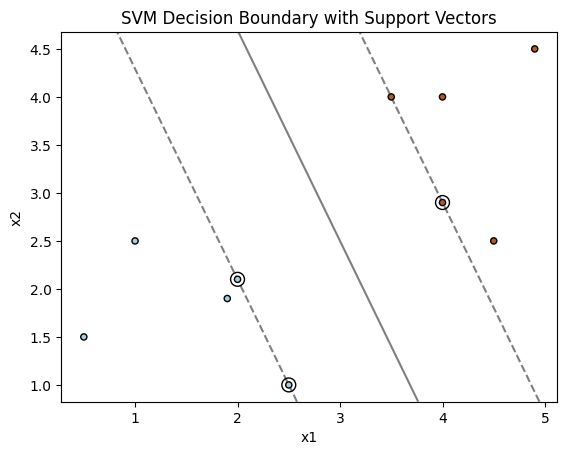

In [118]:
clf= SVC(C=1e9, kernel='linear')
clf.fit(X, y)

'''Extract the parameters required for KKT condition checking'''
supV= clf.support_vectors_
dual_coefs= clf.dual_coef_[0]
w= clf.coef_[0]
b= clf.intercept_[0]

'''Plotting'''
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, zorder=10, edgecolor='k', s=20)
plt.scatter(supV[:, 0], supV[:, 1], facecolors='none', s=100, edgecolors='k', zorder=10)
axes= plt.gca()
xlim= axes.get_xlim()
ylim= axes.get_ylim()
xTemp= np.linspace(xlim[0], xlim[1], 30)
yTemp= np.linspace(ylim[0], ylim[1], 30)
bigY,bigX= np.meshgrid(yTemp, xTemp)
temp= np.vstack([bigX.ravel(), bigY.ravel()]).T
Z= clf.decision_function(temp).reshape(bigX.shape)
axes.contour(bigX, bigY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('SVM Decision Boundary with Support Vectors')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


c. [15 pts] Numerically verify that Karush-Kuhn-Tucker (KKT) conditions are satisfied for data points above using the objective equation on the pdf. Use the same a from Question a.

In [119]:
tempCond= True

for spot in range(len(supV)):
    xi= supV[spot]
    yi= y[clf.support_[spot]]
    ai= dual_coefs[spot]
    fxi= np.dot(w, xi) + b
    yfxi= yi* fxi
    if (ai< 0) or (ai>clf.C):
        print(f'KKT condition 1 violated for support vector index {spot}: a_i is out of bounds')
        tempCond= False
    if (yfxi< 1) and (np.isclose(yfxi, 1, atol=1e-4)==False):
        print(f'KKT condition 2 violated for support vector index {spot}: y_i * f(x_i) is not >= 1')
        tempCond= False
    if (np.isclose(ai* (yfxi - 1), 0, atol=1e-4)==False):
        print(f'KKT condition 3 violated for support vector index {spot}: a_i * (y_i * f(x_i) - 1) is not 0')
        tempCond= False
if tempCond:
    print('All KKT conditions are satisfied.')
else:
    print('Some KKT conditions are not satisfied.')

KKT condition 1 violated for support vector index 0: a_i is out of bounds
KKT condition 1 violated for support vector index 1: a_i is out of bounds
KKT condition 2 violated for support vector index 1: y_i * f(x_i) is not >= 1
KKT condition 3 violated for support vector index 1: a_i * (y_i * f(x_i) - 1) is not 0
KKT condition 2 violated for support vector index 2: y_i * f(x_i) is not >= 1
KKT condition 3 violated for support vector index 2: a_i * (y_i * f(x_i) - 1) is not 0
Some KKT conditions are not satisfied.


d. [15 pts] Using the Lagrangian multiplier, a = [0.414, 0, 0, 0.018, 0, 0, 0.018, 0, 0.414, 0], confirm that KKT conditions are satisfied. Find the hyperplane equation and find the support vectors. Determine if a point (x∗ = [3, 3], y∗ = 1) is in a margin. Guess a possible slack variable ξi for the point, x∗ that satisfies the KKT condition.

In [120]:
a= np.array([0.414, 0, 0, 0.018, 0, 0, 0.018, 0, 0.414, 0])
a= a[:, np.newaxis]
wd= np.sum(a * y[:, np.newaxis] * X, axis=0)

supVecTemp= np.where(a.flatten() > 1e-4)[0]
supVecD= X[supVecTemp]
supLab= y[supVecTemp]
biasTemp= []
for xi, yi in zip(supVecD, supLab):
    indBias = yi-np.dot(wd, xi)
    biasTemp.append(indBias)
bd= np.mean(biasTemp)
tempCond= True
for spot in supVecTemp:
    xi= X[spot]
    yi= y[spot]
    ai= a[spot][0]
    fxi= np.dot(wd, xi)+ bd
    yfxi= yi*fxi
    if (ai< 0 or ai> clf.C):
        print(f'KKT condition 1 violated for support vector index {spot}: a_i is out of bounds')
        tempCond= False
    if (yfxi < 1 and np.isclose(yfxi, 1, atol=1e-4)== False):
        print(f'KKT condition 2 violated for support vector index {spot}: y_i * f(x_i) is not >= 1')
        tempCond= False
    if (np.isclose(ai * (yfxi - 1), 0, atol=1e-4)==False):
        print(f'KKT condition 3 violated for support vector index {spot}: a_i * (y_i * f(x_i) - 1) is not 0')
        tempCond= False

if (tempCond==True):
    print('All KKT conditions are satisfied for the provided Lagrangian multipliers.')
else:
    print('Some KKT conditions are not satisfied for the provided Lagrangian multipliers.')


All KKT conditions are satisfied for the provided Lagrangian multipliers.
